In [174]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [175]:
path_saves = "tmp/saves/models/ddqn_mario_custom_rewards"
rewards = np.loadtxt(f"{path_saves}/rewards")
epsilons = np.loadtxt(f"{path_saves}/epsilon")

In [176]:
rewards.shape, epsilons.shape

((19901,), (19901,))

In [177]:
average_rewards = []
sampled = []
for i, r in enumerate(rewards[:-100]):
    #average_rewards.append(rewards[i:i+100].mean())
    average_rewards.append(rewards[i:i+100].mean())
    if i % 100 == 0:
        sampled.append(rewards[i])
average_rewards = np.array(average_rewards)

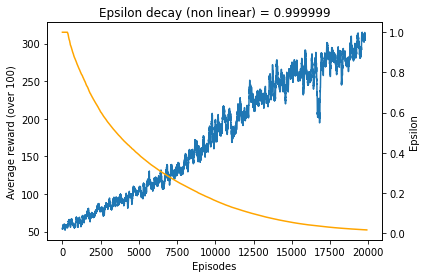

In [178]:
plt.title("Epsilon decay (non linear) = 0.999999")
plt.plot(average_rewards)
ax = plt.gca()
ax.set_xlabel('Episodes')
ax.set_ylabel('Average reward (over 100)')
plt.twinx()
ax = plt.gca()
ax.set_ylabel('Epsilon')
plt.plot(epsilons, 'orange')
plt.savefig('graphs/training_average_morio.png')

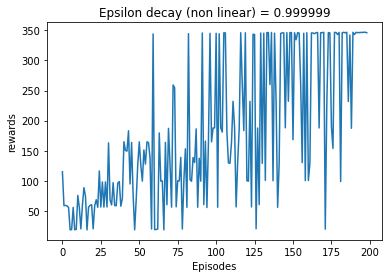

In [179]:
plt.title("Epsilon decay (non linear) = 0.999999")
plt.plot(sampled)
ax = plt.gca()
ax.set_xlabel('Episodes')
ax.set_ylabel('rewards')
plt.savefig('graphs/training_morio.png')

In [180]:
epsilons[-1]

0.016265254704998247

In [181]:
ran = np.arange(8000, 11000)
#ran = np.arange(1, 8000)
res = []
for i in range(len(rewards)):
    if i % 1 == 0 and rewards[i] > 320 and i in ran:
        #print(i, " : ", rewards[i])
        res.append(i)

print(len(res))

506


In [182]:
23/12500

0.00184

In [183]:
25000*0.00184

46.0

In [184]:
def get_hist(rewards, minid, maxid, ax, width=20):
    hist, bin_edges = np.histogram(rewards[minid:maxid], bins='auto', density=True)
    ax.bar(bin_edges[:-1], hist, width)

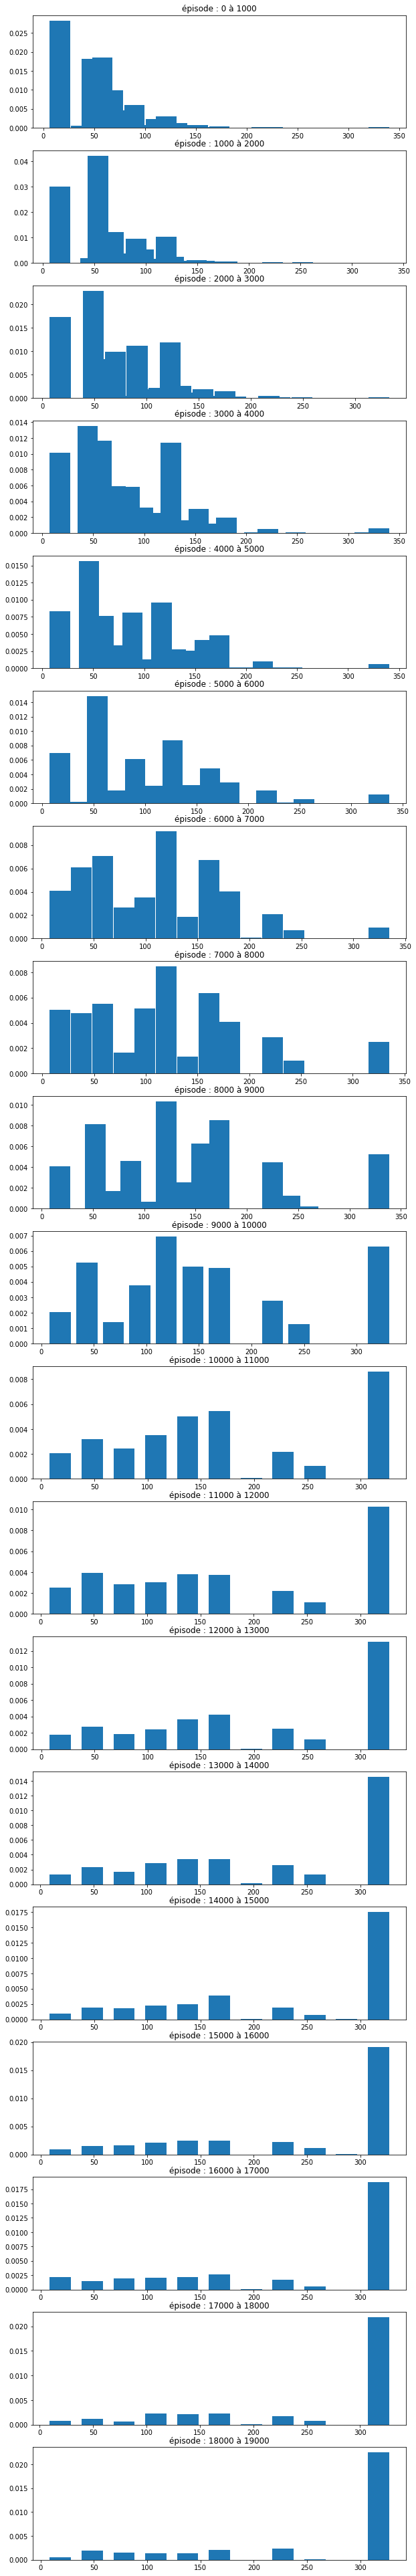

In [185]:
nb_plots = 19
fig, axs = plt.subplots(nb_plots, figsize=(10, 70))
for i in range(nb_plots):
    minid = i*1000
    maxid = i*1000+1000
    axs[i].set_title(f"épisode : {minid} à {maxid}")
    get_hist(rewards, minid, maxid, ax=axs[i], width=20)
plt.savefig('graphs/density_hist_custom_rewards.png', dpi=100)